In [1]:
import sys, os, json, re

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

dirPath = os.path.dirname(os.path.realpath("__file__"))
packagesPath = os.path.join(dirPath, 'packages')

if not packagesPath in sys.path:
    sys.path.append(packagesPath)
    
# IPython extension to reload modules before executing user code.
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%reload_ext autoreload
%autoreload 2

train = True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import packages.dataset as dataset

excludedFiles = [
"43_content.txt",
"38_content.txt",
"48_content.txt",
"34_content.txt",
"26_content.txt",
"41_content.txt",
"29_content.txt",
"39_content.txt",
"23_content.txt",
"28_content.txt",
"30_content.txt",
"46_content.txt",
"40_content.txt",
"33_content.txt",
"17_content.txt",
"18_content.txt",
"50_content.txt",
"49_content.txt",
"47_content.txt"
]
datasetPath = os.path.join(dirPath, 'datasets')
dataProcessor = dataset.Brexit(datasetPath)
dataProcessor.setExcludedFilenames(excludedFiles)
dataProcessor.loadFilePaths()

Dataset path:
/notebooks/Papers/paper2/datasets/brexit
Total files 29
-------------------------------
Training file count:  23
Total files in list:  23
-------------------------------
Total validation file count 2
Total files in list:  2
-------------------------------
Total test file count 4
Total files in list:  4
-------------------------------


In [3]:
#dataProcessor.print()

In [4]:
from packages.gc.vocab import Vocab
vocabProcessor = Vocab(dataProcessor)
if train:
    vocabProcessor.buildVocab()

----------------------
Total local vocab:  76
Filtered local vocab:  8
----------------------
Total local vocab:  76
Filtered local vocab:  8
----------------------
Total local vocab:  68
Filtered local vocab:  5
----------------------
Total local vocab:  68
Filtered local vocab:  5
----------------------
Total local vocab:  138
Filtered local vocab:  8
----------------------
Total local vocab:  138
Filtered local vocab:  8
----------------------
Total local vocab:  170
Filtered local vocab:  4
----------------------
Total local vocab:  170
Filtered local vocab:  4
----------------------
Total local vocab:  137
Filtered local vocab:  6
----------------------
Total local vocab:  137
Filtered local vocab:  6
----------------------
Total local vocab:  78
Filtered local vocab:  4
----------------------
Total local vocab:  78
Filtered local vocab:  4
----------------------
Total local vocab:  153
Filtered local vocab:  2
----------------------
Total local vocab:  153
Filtered local vocab:  

In [5]:
from packages.gc.lda import LDA

ldaProcessor = LDA(dataProcessor)

if train:
    ldaProcessor.setNumberOfIterations(500)
    ldaProcessor.setPerplexity(10)
    ldaProcessor.setNumberOfTopics(10)
    ldaProcessor.buildWordCoOccurenceVectors()
    ldaProcessor.train()


Finished training LDA


In [6]:
from packages.gc.tsne import TSNE
tsneProcessor = TSNE(dataProcessor)

# TSNE is trained with word co-occurence matrix
if train:
    tsneProcessor.setNumberOfIterations(500)
    tsneProcessor.setPerplexity(10)
    tsneProcessor.setNumberOfTopics(10)
    tsneProcessor.train()


Trained for TSNE


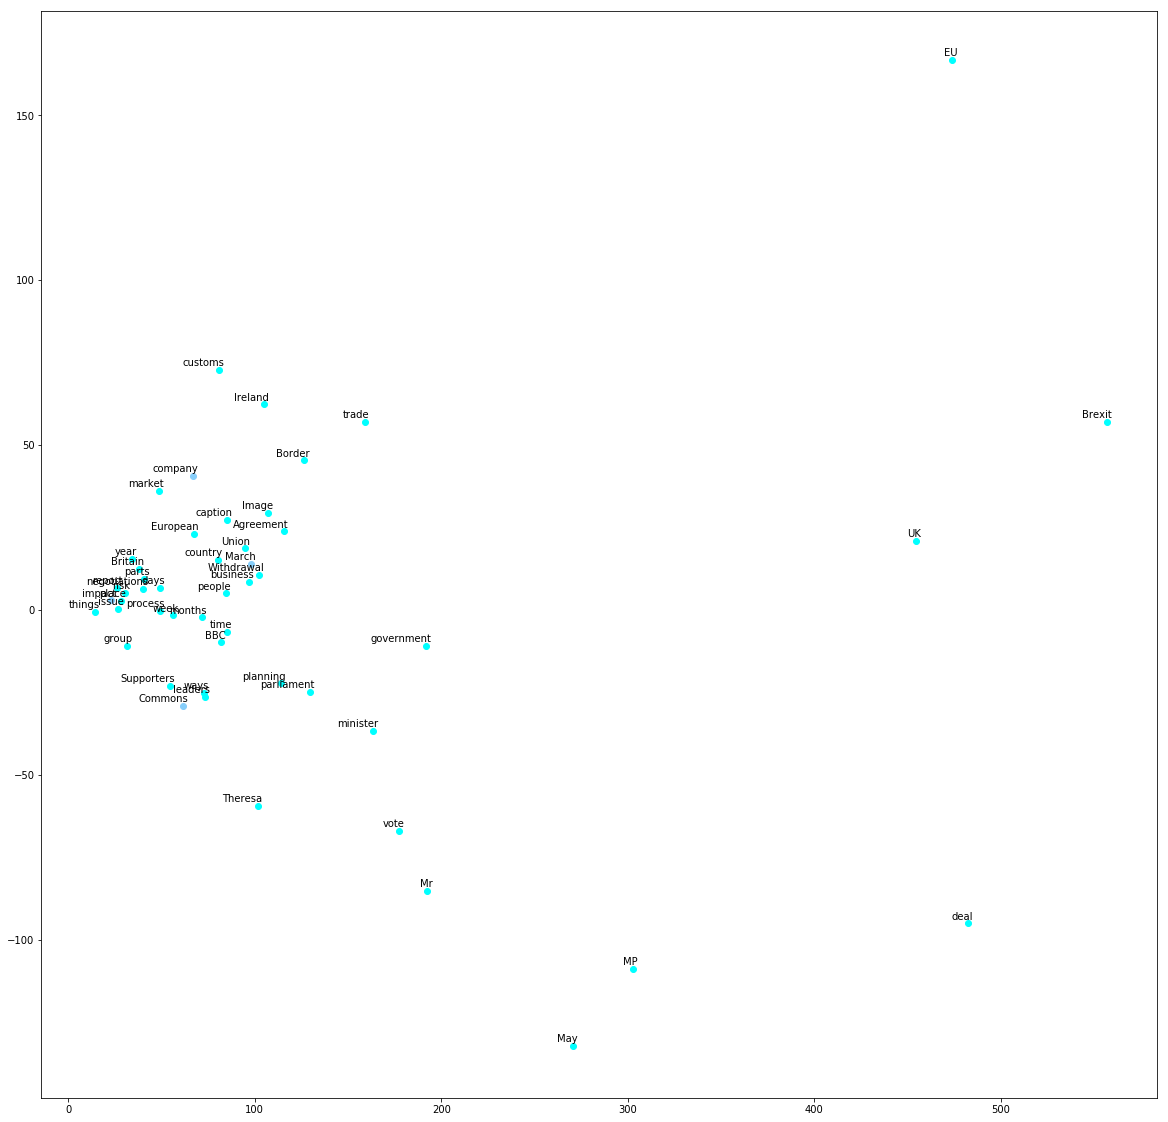

In [7]:
from packages.gc.plotter import Plotter

# Display TSNE word co-occurance trained points (all topic)

tsnePoints = tsneProcessor.getPoints(50)
plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()


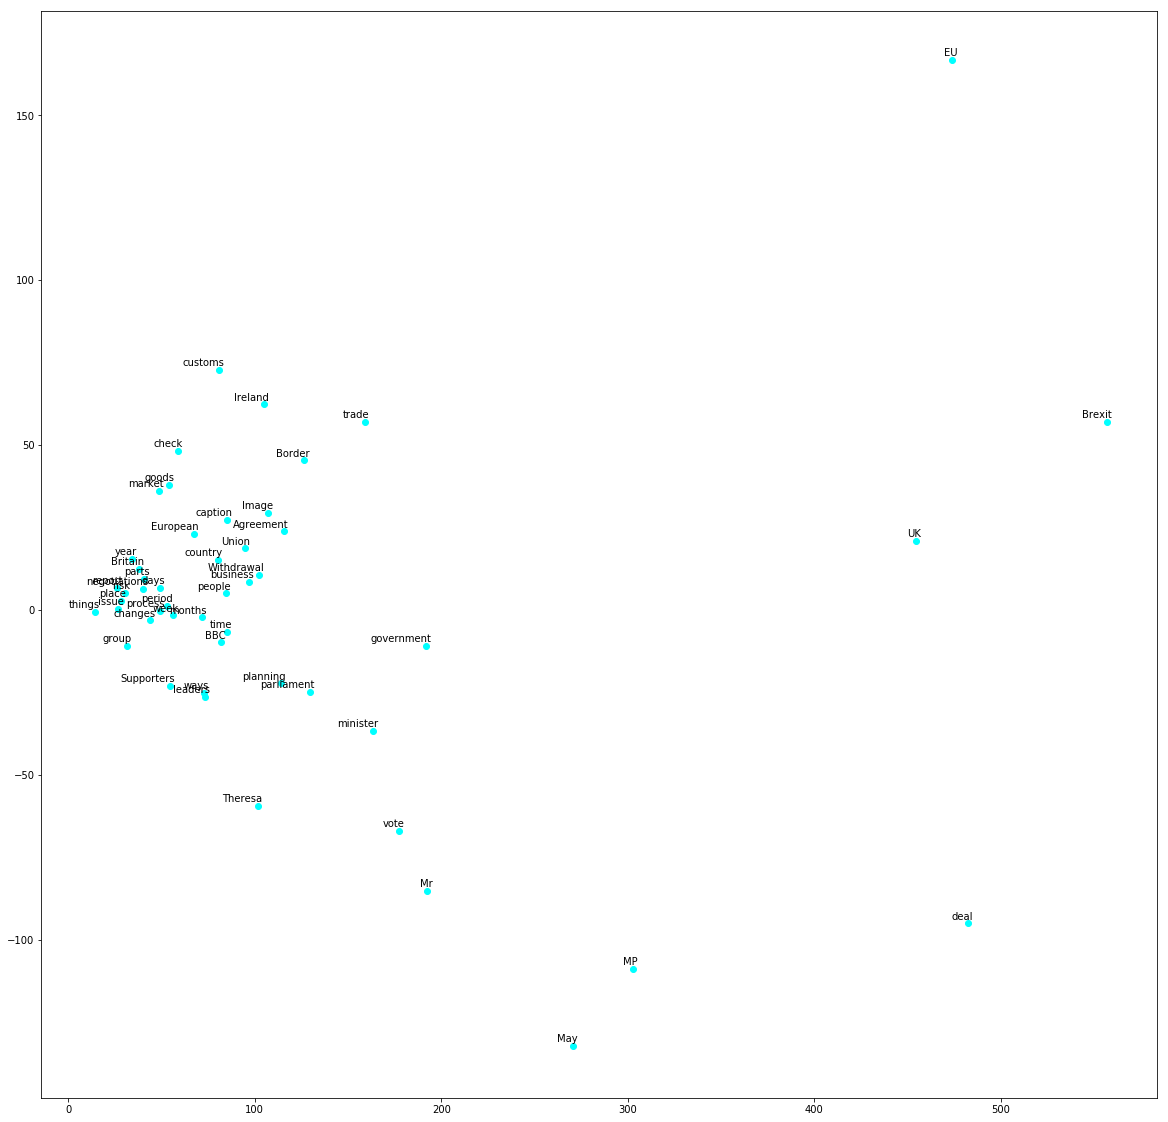

In [8]:
# Display TSNE word co-occurance trained points (all topic)

tsneProcessor.setTopicFilter(9)
tsnePoints = tsneProcessor.getPoints(50)
plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()


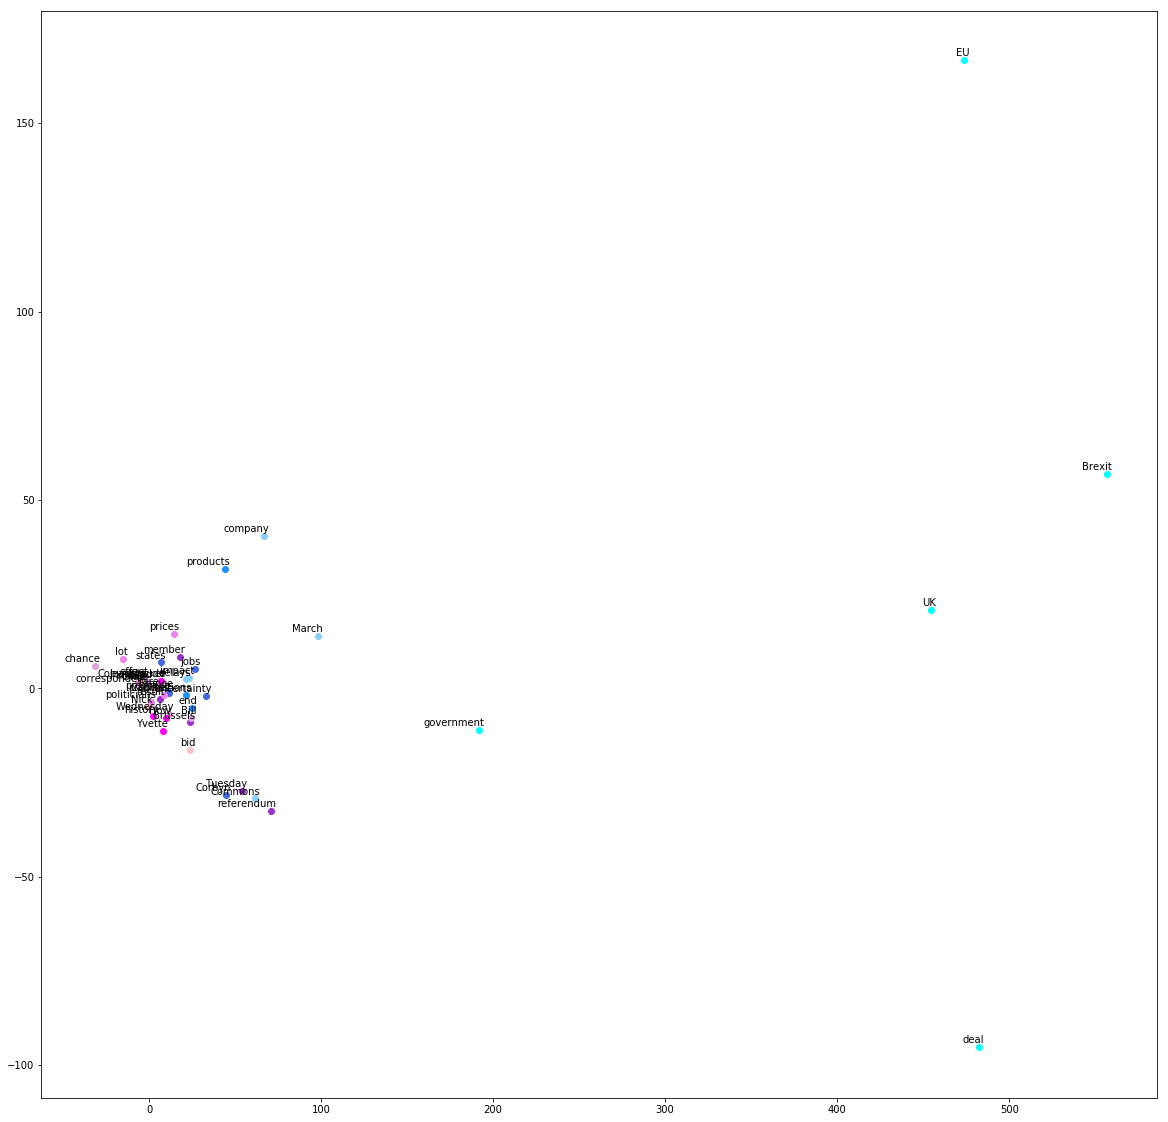

[{'number_of_blocks': 137, 'total_count': 1434, 'label': 'Brexit', 'stemmed_word': 'brexit', 'score': 231234, 'appeared': 1548806400, 'index': 3, 'topic': 9, 'x': 556.6862, 'y': 57.003025}, {'number_of_blocks': 129, 'total_count': 817, 'label': 'EU', 'stemmed_word': 'eu', 'score': 95334, 'appeared': 1548806400, 'index': 21, 'topic': 9, 'x': 473.9505, 'y': 166.80554}, {'number_of_blocks': 128, 'total_count': 857, 'label': 'UK', 'stemmed_word': 'uk', 'score': 75137, 'appeared': 1548806400, 'index': 19, 'topic': 9, 'x': 454.47958, 'y': 20.813816}, {'number_of_blocks': 117, 'total_count': 852, 'label': 'deal', 'stemmed_word': 'deal', 'score': 131151, 'appeared': 1546560000, 'index': 79, 'topic': 9, 'x': 482.37427, 'y': -95.09701}, {'number_of_blocks': 91, 'total_count': 332, 'label': 'government', 'stemmed_word': 'govern', 'score': 13335, 'appeared': 1548806400, 'index': 38, 'topic': 9, 'x': 192.05917, 'y': -11.000302}, {'number_of_blocks': 80, 'total_count': 155, 'label': 'March', 'stemme

In [21]:
# Display TSNE word co-occurance trained points (main topic)

numberOfWords = 5

tsneProcessor.setTopicFilter(9)
tsnePoints = tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(8)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(7)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(6)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(5)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(4)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(3)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(2)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

tsneProcessor.setTopicFilter(1)
tsnePoints += tsneProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(tsnePoints)
plotProcessor.displayPlot()

print(tsnePoints)



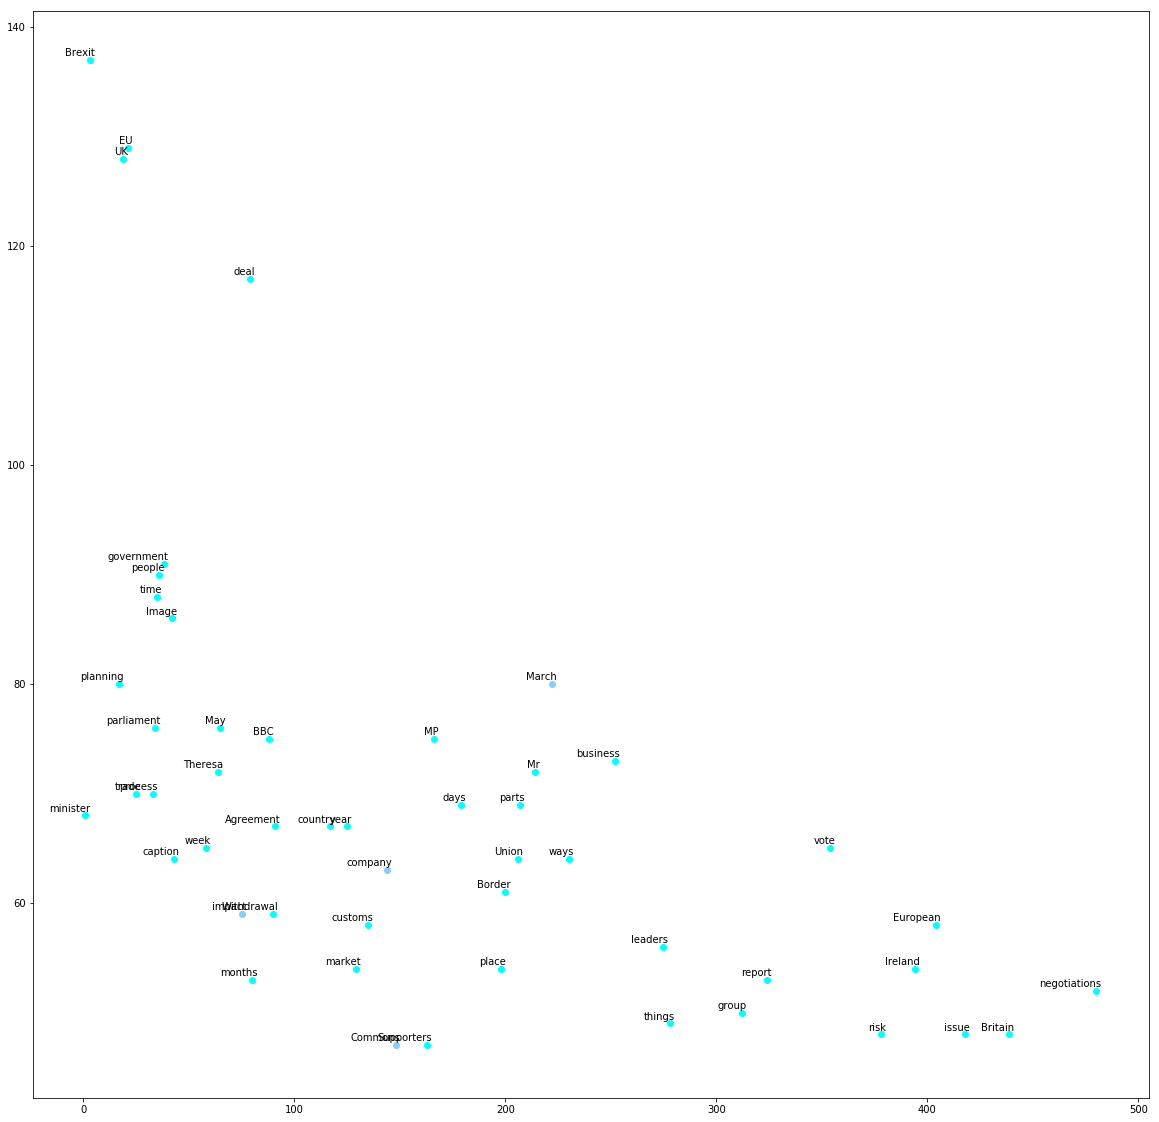

In [10]:
from packages.gc.linear import Linear
linearProcessor = Linear(dataProcessor)

# Display top 50 points (all topics)
linearProcessor.setStartX(0)
wordInfo = linearProcessor.getPoints(50)
linearPlotProcessor = Plotter(wordInfo)
linearPlotProcessor.displayPlot()

[{'number_of_blocks': 23, 'total_count': 27, 'label': 'How', 'stemmed_word': 'how', 'score': 0, 'appeared': 1548979200, 'index': 521, 'y': 23, 'topic': 1, 'x': 521}, {'number_of_blocks': 16, 'total_count': 19, 'label': 'JeanClaude', 'stemmed_word': 'jeanclaud', 'score': 0, 'appeared': 1548979200, 'index': 458, 'y': 16, 'topic': 1, 'x': 458}, {'number_of_blocks': 16, 'total_count': 19, 'label': 'Juncker', 'stemmed_word': 'juncker', 'score': 0, 'appeared': 1548979200, 'index': 459, 'y': 16, 'topic': 1, 'x': 459}, {'number_of_blocks': 16, 'total_count': 19, 'label': 'history', 'stemmed_word': 'histori', 'score': 0, 'appeared': 1547596800, 'index': 643, 'y': 16, 'topic': 1, 'x': 643}, {'number_of_blocks': 16, 'total_count': 16, 'label': 'Yvette', 'stemmed_word': 'yvett', 'score': 0, 'appeared': 1546732800, 'index': 961, 'y': 16, 'topic': 1, 'x': 961}, {'number_of_blocks': 20, 'total_count': 20, 'label': 'Nick', 'stemmed_word': 'nick', 'score': 0, 'appeared': 1547510400, 'index': 862, 'y': 

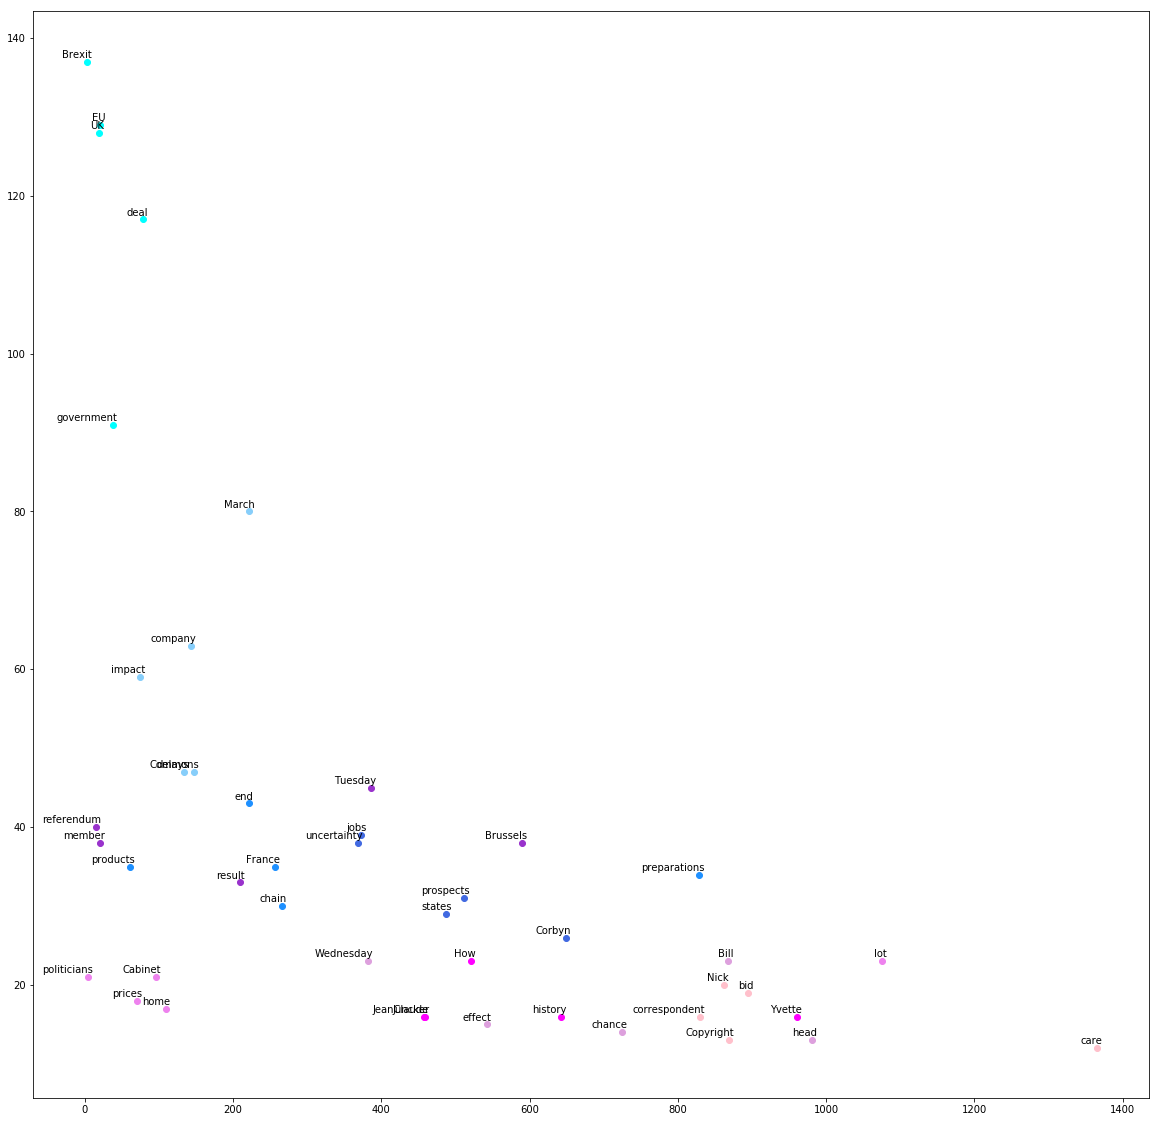

In [23]:
# Display TSNE word co-occurance trained points (main topic)

numberOfWords = 5

linearProcessor.setTopicFilter(1)
linearProcessor.setStartX(0)
wordInfo = linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(2)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(3)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(4)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(5)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(6)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(7)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(8)
wordInfo += linearProcessor.getPoints(numberOfWords)

linearProcessor.setTopicFilter(9)
wordInfo += linearProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(wordInfo)
print(wordInfo)
plotProcessor.displayPlot()

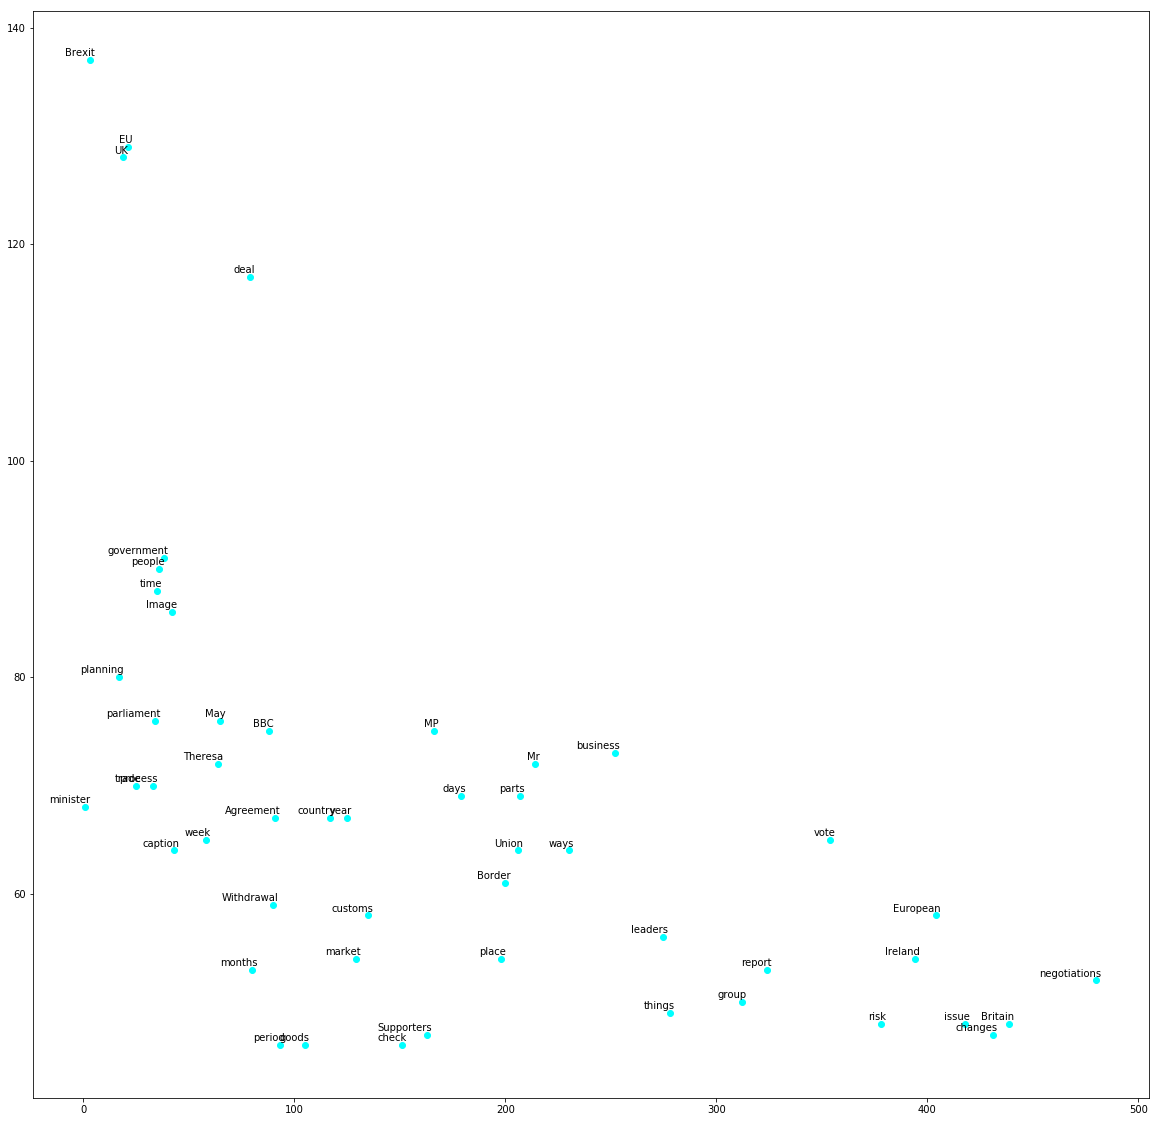

In [12]:
# Display top 50 points (top topic)
linearProcessor.setTopicFilter(9)
wordInfo = linearProcessor.getPoints(50)
linearPlotProcessor = Plotter(wordInfo)
linearPlotProcessor.displayPlot()

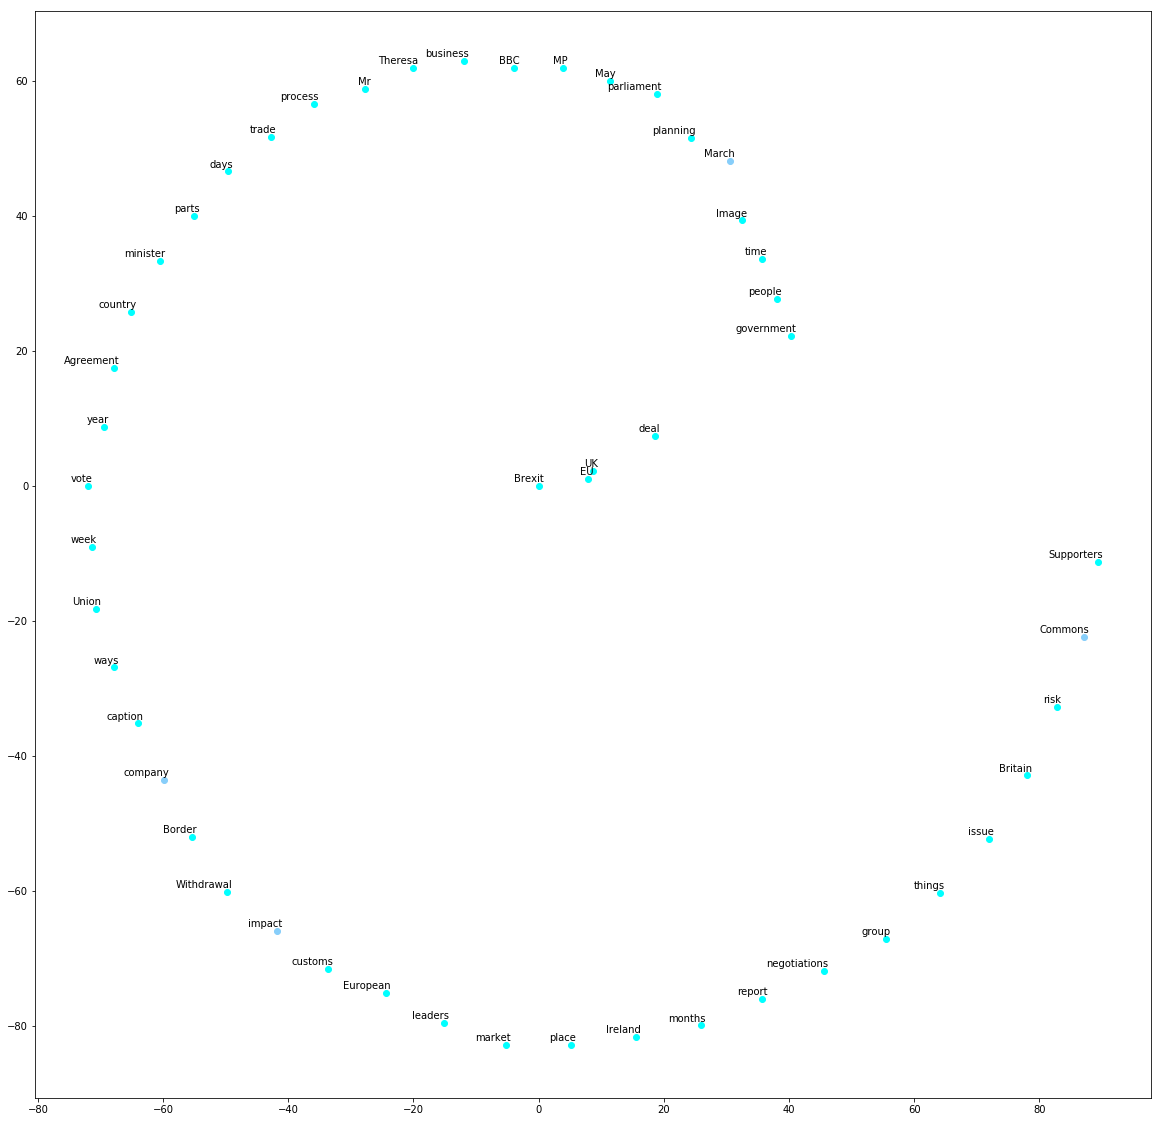

In [13]:

from packages.gc.peripheral import Peripheral
peripheralProcessor = Peripheral(dataProcessor)


# Display top 50 points (all topics)
peripheralProcessor.setTotalAngle(360)
peripheralProcessor.setStartAngle(0)
wordInfo = peripheralProcessor.getPoints(50)
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()


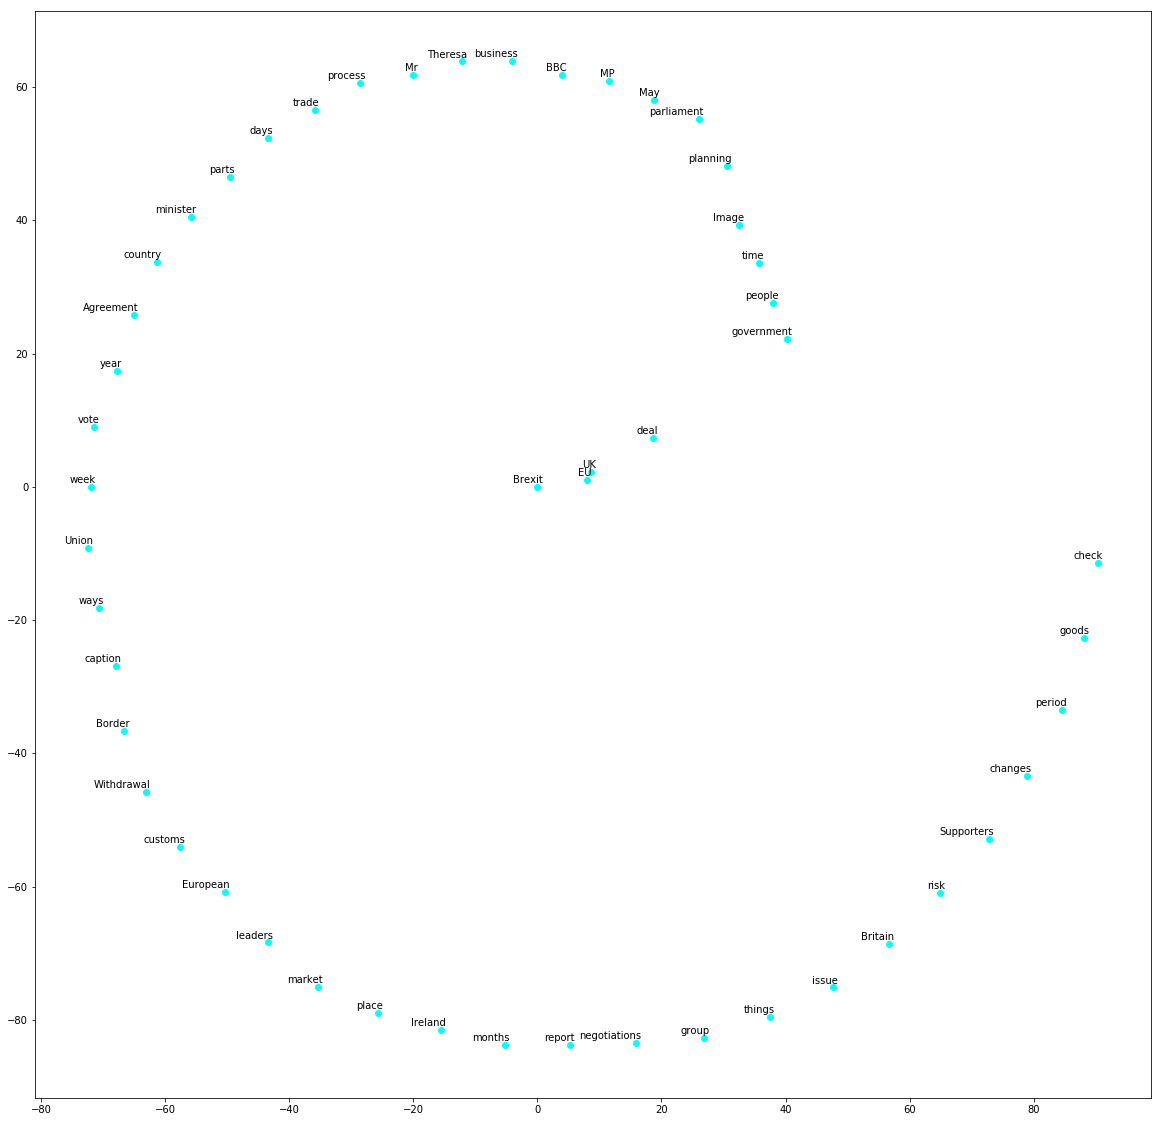

In [14]:
# Display top 50 points (top topic)
peripheralProcessor.setTotalAngle(360)
peripheralProcessor.setStartAngle(0)
peripheralProcessor.setTopicFilter(9)
wordInfo = peripheralProcessor.getPoints(50)
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

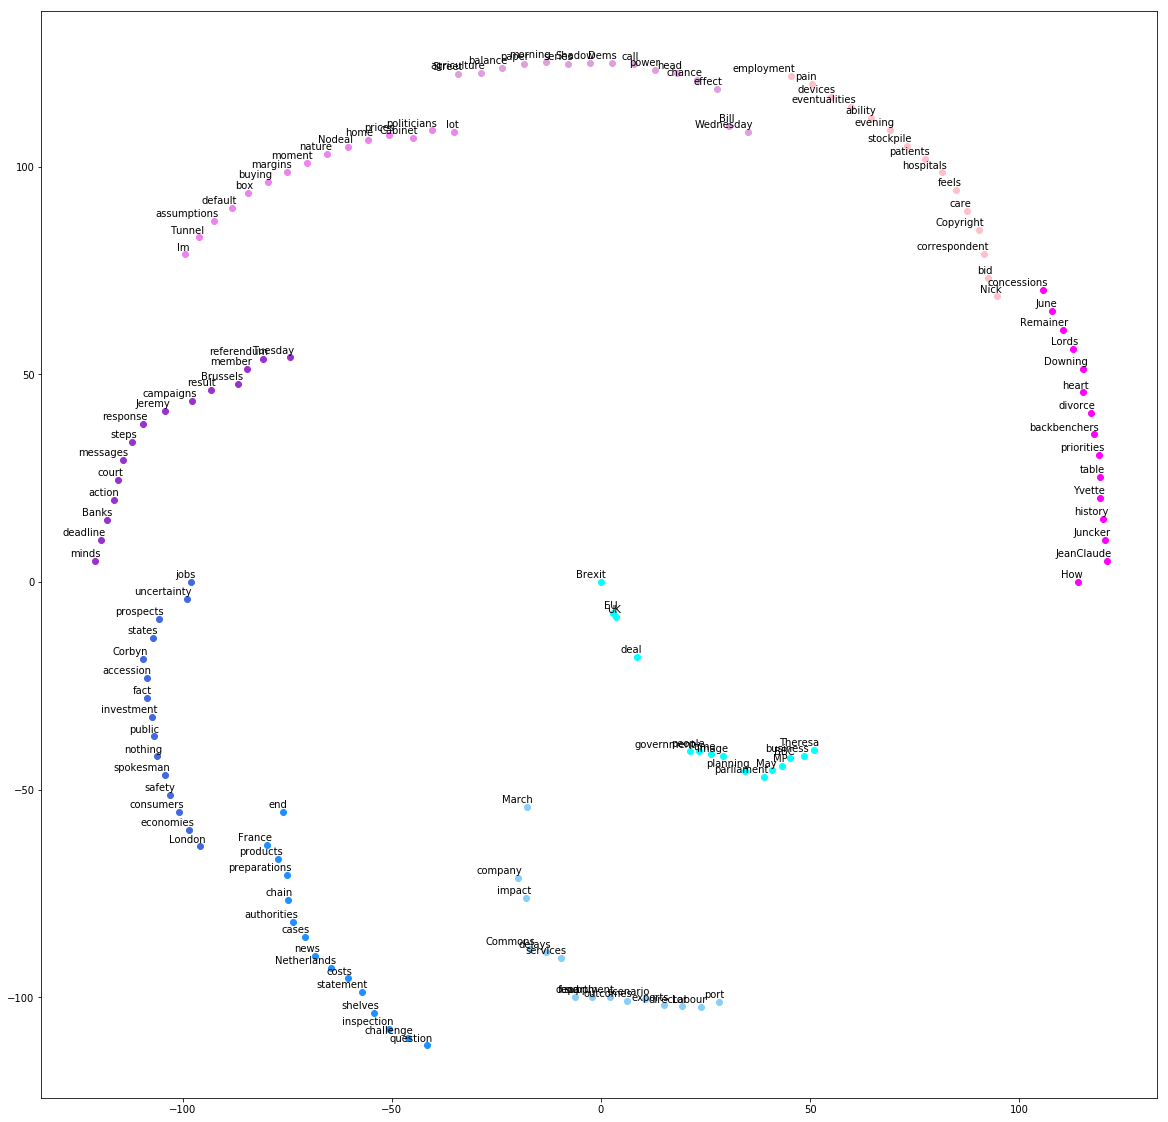

In [19]:

# All topics
peripheralProcessor.setStartAngle(0)
peripheralProcessor.setTotalAngle(360 / 10)

numberOfWords = 15
peripheralProcessor.setTopicFilter(1)
wordInfo = peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(2)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(3)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(4)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(5)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(6)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(7)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(8)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

peripheralProcessor.setTopicFilter(9)
wordInfo += peripheralProcessor.getPoints(numberOfWords)

plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()



In [16]:
from packages.gc.word2vec import Word2Vec
word2vecProcessor = Word2Vec(dataProcessor)

if train:
    word2vecProcessor.setNumberOfIterations(500)
    word2vecProcessor.setPerplexity(10)
    word2vecProcessor.setNumberOfTopics(10)
    skipWindow = 2
    word2vecProcessor.resetIndex()
    word2vecProcessor.setSkipWindow(skipWindow)
    word2vecProcessor.setBatchSize(128)
    word2vecProcessor.train()



Instructions for updating:
Colocations handled automatically by placer.
Batches:  14
Instructions for updating:
Use tf.cast instead.
--------------------------

Average loss after epoch  0 :  12.181461879185267

Average loss after epoch  0 :  12.088149245904416

Average loss after epoch  0 :  12.559116852874311

Average loss after epoch  0 :  10.765102148949726

Average loss after epoch  0 :  11.196459889475761

Average loss after epoch  0 :  12.551353667468135

Average loss after epoch  0 :  10.836229067068036

Average loss after epoch  0 :  10.984195282134325

Average loss after epoch  0 :  11.282577756620086

Average loss after epoch  0 :  10.194123421650318

Average loss after epoch  0 :  10.520316066808729

Average loss after epoch  0 :  9.73999234200001

Average loss after epoch  0 :  11.305197730064734

Average loss after epoch  0 :  9.297546864577726
Similar to scenario: January, Italy, pact, Transplant, Olaf,
Similar to EU: Christian, versa, recognition, Ads, nightmare,
Simila


Average loss after epoch  6 :  4.882846703184981

Average loss after epoch  6 :  3.2369153066797867

Average loss after epoch  6 :  4.096338796930113

Average loss after epoch  6 :  4.155394046669673
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: routes, port, ways, May, minister,
Similar to time: UK, Dover, trade, contingency, workforce,
Similar to immigration: freedom, customs, beef, devices, design,
Similar to Could: Arlene, Democratic, Transplant, bandwagon, servants,
Similar to referendum: fall, uturn, insurance, brakes, plate,
Similar to Guernsey: bit, JLR, vote, team, House,
Similar to Jersey: centre, Banks, Belgium, Hampshire, spokesperson,
--------------------------

Average loss after epoch  7 :  4.1910825456891745

Average loss after epoch  7 :  4.663032298185387

Average loss after epoch  7 :  3.3515652081014116

Average loss after epoch  7 :  4.152511245158751

Average loss after epoch  7 :  4.849223520510781

Average loss after epoch  7 :  


Average loss after epoch  14 :  1.1550770254377942

Average loss after epoch  14 :  1.1597980803779506

Average loss after epoch  14 :  2.1995552902174262

Average loss after epoch  14 :  2.2073570583885074

Average loss after epoch  14 :  0.8220758189376277
Similar to scenario: January, Italy, Channel, Hampshire, tariffs,
Similar to EU: routes, Information, Tuesday, ways, port,
Similar to time: UK, Dover, contingency, trade, Office,
Similar to immigration: customs, beef, freedom, design, procedure,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, EU, uturn, planning,
Similar to Guernsey: vote, JLR, House, team, year,
Similar to Jersey: centre, Banks, Belgium, Hampshire, goods,
--------------------------

Average loss after epoch  15 :  1.9781338827950614

Average loss after epoch  15 :  1.1429527633044183

Average loss after epoch  15 :  1.8392796405202794

Average loss after epoch  15 :  2.6258569777582847

Average loss a

Similar to Jersey: Banks, centre, Belgium, goods, Hampshire,
--------------------------

Average loss after epoch  22 :  0.7982697486877441

Average loss after epoch  22 :  0.5241554805210659

Average loss after epoch  22 :  0.6920060332940549

Average loss after epoch  22 :  0.9475958632310695

Average loss after epoch  22 :  0.8672560473771355

Average loss after epoch  22 :  1.0769709094684143

Average loss after epoch  22 :  0.7502138851960558

Average loss after epoch  22 :  0.956103003017108

Average loss after epoch  22 :  1.1217491056232227

Average loss after epoch  22 :  1.1236690242071137

Average loss after epoch  22 :  0.6589859125087602

Average loss after epoch  22 :  0.7594436108858098

Average loss after epoch  22 :  1.0897501770924296

Average loss after epoch  22 :  1.198054986796711
Similar to scenario: January, Italy, Channel, Hampshire, pact,
Similar to EU: routes, Information, one, Tuesday, referendum,
Similar to time: UK, Dover, contingency, Office, sector,
Simi


Average loss after epoch  29 :  0.8363589839237994

Average loss after epoch  29 :  0.4724347903338079

Average loss after epoch  29 :  0.6582874422556374
Similar to scenario: January, Italy, Hampshire, Channel, pact,
Similar to EU: Information, routes, one, Tuesday, Square,
Similar to time: UK, Dover, contingency, Office, sector,
Similar to immigration: customs, beef, freedom, confines, design,
Similar to Could: Arlene, Democratic, scenario, bandwagon, newspapers,
Similar to referendum: fall, insurance, uturn, planning, EU,
Similar to Guernsey: JLR, vote, team, House, threat,
Similar to Jersey: Banks, Belgium, centre, goods, Hampshire,
--------------------------

Average loss after epoch  30 :  0.7104541233607701

Average loss after epoch  30 :  0.46492495828745317

Average loss after epoch  30 :  0.6624405147730436

Average loss after epoch  30 :  0.4320238811778109

Average loss after epoch  30 :  0.325656473516049

Average loss after epoch  30 :  0.28292256167095486

Average loss 


Average loss after epoch  36 :  0.6157878285601959

Average loss after epoch  36 :  0.3384019537054018

Average loss after epoch  36 :  0.2438027972499708

Average loss after epoch  36 :  0.28154877335202255
Similar to scenario: January, Italy, Hampshire, Channel, pact,
Similar to EU: Information, one, routes, Tuesday, Square,
Similar to time: UK, Dover, contingency, Office, sector,
Similar to immigration: customs, beef, freedom, confines, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, planning, EU,
Similar to Guernsey: JLR, team, vote, House, providers,
Similar to Jersey: Banks, Belgium, centre, goods, Hampshire,
--------------------------

Average loss after epoch  37 :  0.3270430564880371

Average loss after epoch  37 :  0.2437032972063337

Average loss after epoch  37 :  0.25822163844595153

Average loss after epoch  37 :  0.2752495161298413

Average loss after epoch  37 :  0.28211983862095996

Average los


Average loss after epoch  44 :  0.1985786793863333

Average loss after epoch  44 :  0.1989232872088435

Average loss after epoch  44 :  0.24423733335279058

Average loss after epoch  44 :  0.22278282683629552

Average loss after epoch  44 :  0.26120795355065857

Average loss after epoch  44 :  0.2991486202718418

Average loss after epoch  44 :  0.18981053581579527

Average loss after epoch  44 :  0.21560646959056742

Average loss after epoch  44 :  0.23019271370052602

Average loss after epoch  44 :  0.1877985548946682
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: Information, one, routes, Tuesday, Square,
Similar to time: UK, Dover, contingency, Office, sector,
Similar to immigration: customs, beef, freedom, confines, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, planning, Affairs,
Similar to Guernsey: JLR, team, House, vote, providers,
Similar to Jersey: Banks, Belgium, centr


Average loss after epoch  51 :  0.15229790238138227

Average loss after epoch  51 :  0.16833642041938376

Average loss after epoch  51 :  0.18294120041831397

Average loss after epoch  51 :  0.16049759743348763

Average loss after epoch  51 :  0.20679068079855895

Average loss after epoch  51 :  0.19306559187405653
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: Information, one, routes, Tuesday, Square,
Similar to time: UK, Dover, contingency, Office, sector,
Similar to immigration: customs, beef, confines, freedom, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, planning, Affairs,
Similar to Guernsey: JLR, team, House, vote, providers,
Similar to Jersey: Banks, Belgium, centre, goods, Hampshire,
--------------------------

Average loss after epoch  52 :  0.22358689989362443

Average loss after epoch  52 :  0.20072632906388263

Average loss after epoch  52 :  0.18658778062714781




Average loss after epoch  58 :  0.5228256263137965

Average loss after epoch  58 :  0.19664559391141725

Average loss after epoch  58 :  0.14908013005128984

Average loss after epoch  58 :  0.15950317699218894
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, routes, Square, Tuesday,
Similar to time: UK, Dover, contingency, Office, sector,
Similar to immigration: customs, beef, confines, freedom, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, planning, Affairs,
Similar to Guernsey: JLR, team, House, providers, vote,
Similar to Jersey: Banks, Belgium, centre, goods, Hampshire,
--------------------------

Average loss after epoch  59 :  0.2251800468989781

Average loss after epoch  59 :  0.2675655496363737

Average loss after epoch  59 :  0.24301866557090693

Average loss after epoch  59 :  0.16896050591262268

Average loss after epoch  59 :  0.15359724803977928

Ave


Average loss after epoch  66 :  0.16754600179786236

Average loss after epoch  66 :  0.17155233222288374

Average loss after epoch  66 :  0.16332423062412688

Average loss after epoch  66 :  0.15552455142231833

Average loss after epoch  66 :  0.25785397202847404

Average loss after epoch  66 :  0.1969649782571608

Average loss after epoch  66 :  0.1956059761756475

Average loss after epoch  66 :  0.13636194686033765

Average loss after epoch  66 :  0.1213498960080164

Average loss after epoch  66 :  0.18200370846860764

Average loss after epoch  66 :  0.15478307660042753

Average loss after epoch  66 :  0.13983921114576678
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, routes, Tuesday,
Similar to time: UK, Dover, contingency, Office, sector,
Similar to immigration: customs, beef, confines, Die, Asian,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, planning, 


Average loss after epoch  74 :  0.13994789479015143

Average loss after epoch  74 :  0.14435473535588658

Average loss after epoch  74 :  0.1438270150580089

Average loss after epoch  74 :  0.1593155558546248

Average loss after epoch  74 :  0.1329100876737199

Average loss after epoch  74 :  0.13835864939638945

Average loss after epoch  74 :  0.1830576698541279

Average loss after epoch  74 :  0.13097133835553865
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Tuesday, routes,
Similar to time: UK, contingency, Dover, Office, Sueddeutsche,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, planning, Affairs,
Similar to Guernsey: JLR, team, House, providers, vote,
Similar to Jersey: Banks, Belgium, centre, goods, Hampshire,
--------------------------

Average loss after epoch  75 :  0.20891070365905762




Average loss after epoch  81 :  0.1385937025353484

Average loss after epoch  81 :  0.11830863136766334

Average loss after epoch  81 :  0.13388425734690115

Average loss after epoch  81 :  0.14270723336300062

Average loss after epoch  81 :  0.1248547267866708

Average loss after epoch  81 :  0.16170448371308602

Average loss after epoch  81 :  0.12806578641032715
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Tuesday, routes,
Similar to time: UK, contingency, Dover, Office, Sueddeutsche,
Similar to immigration: customs, beef, confines, Die, Asian,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, vote,
Similar to Jersey: Banks, Belgium, centre, Hampshire, goods,
--------------------------

Average loss after epoch  82 :  0.2025709322520665

Average loss after epoch  82 :  0.15387513077988915



Average loss after epoch  88 :  0.10911133934755722
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Tuesday, routes,
Similar to time: UK, contingency, Dover, Office, Sueddeutsche,
Similar to immigration: customs, beef, confines, Die, Asian,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, planning, Affairs,
Similar to Guernsey: JLR, team, House, providers, vote,
Similar to Jersey: Banks, Belgium, centre, Hampshire, goods,
--------------------------

Average loss after epoch  89 :  0.20127272605895996

Average loss after epoch  89 :  0.17098639692578996

Average loss after epoch  89 :  0.15412396922403454

Average loss after epoch  89 :  0.1564577099359418

Average loss after epoch  89 :  0.13257153031851837

Average loss after epoch  89 :  0.13635775531872824

Average loss after epoch  89 :  0.1537366573906688

Average loss after epoch  89 :  0.14705215653420026


Average loss after epoch  97 :  0.16167889444195493

Average loss after epoch  97 :  0.15210340591283303

Average loss after epoch  97 :  0.16325688232411348

Average loss after epoch  97 :  0.14483181058610436

Average loss after epoch  97 :  0.12482244870438815

Average loss after epoch  97 :  0.1524321231823412

Average loss after epoch  97 :  0.13130143138327235

Average loss after epoch  97 :  0.1266200392392122

Average loss after epoch  97 :  0.11545606914692581

Average loss after epoch  97 :  0.13990463278374038

Average loss after epoch  97 :  0.11558118140532925

Average loss after epoch  97 :  0.11930640444573501

Average loss after epoch  97 :  0.12427891713197511
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Tuesday, routes,
Similar to time: UK, contingency, Dover, Office, Sueddeutsche,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspaper


Average loss after epoch  105 :  0.14861669693947435

Average loss after epoch  105 :  0.11621540966102098

Average loss after epoch  105 :  0.1308593708720013

Average loss after epoch  105 :  0.14292517700682228

Average loss after epoch  105 :  0.12931603434461222

Average loss after epoch  105 :  0.1472619731105352

Average loss after epoch  105 :  0.13341402126832366

Average loss after epoch  105 :  0.10783341889827278

Average loss after epoch  105 :  0.11092315640140774

Average loss after epoch  105 :  0.11599880352338808

Average loss after epoch  105 :  0.10118146871862004
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Tuesday, Progressive,
Similar to time: UK, contingency, Dover, Office, Sueddeutsche,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, Affairs, planning,
Similar to Guernsey: 


Average loss after epoch  113 :  0.10843800541146249

Average loss after epoch  113 :  0.10732352665235857

Average loss after epoch  113 :  0.13219677545568082

Average loss after epoch  113 :  0.10567223113061468

Average loss after epoch  113 :  0.12247816940239602

Average loss after epoch  113 :  0.10726993724000704

Average loss after epoch  113 :  0.12464286134661114

Average loss after epoch  113 :  0.11191661105696706

Average loss after epoch  113 :  0.1302174634494557

Average loss after epoch  113 :  0.12275415025125071
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Tuesday, Progressive,
Similar to time: UK, contingency, Dover, Sueddeutsche, Office,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jerse


Average loss after epoch  121 :  0.13877622135874132

Average loss after epoch  121 :  0.17435579062103976

Average loss after epoch  121 :  0.14045124718163676

Average loss after epoch  121 :  0.12427413000139045

Average loss after epoch  121 :  0.10880511114531503

Average loss after epoch  121 :  0.10446542012516498

Average loss after epoch  121 :  0.11256309457323653

Average loss after epoch  121 :  0.12174061941795526

Average loss after epoch  121 :  0.11785897471201774

Average loss after epoch  121 :  0.11917402691620614

Average loss after epoch  121 :  0.11846143173815098

Average loss after epoch  121 :  0.11262958828015078
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Tuesday, Progressive,
Similar to time: UK, contingency, Dover, Sueddeutsche, Office,
Similar to immigration: customs, beef, confines, Die, Asian,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, in

Similar to Jersey: Banks, Belgium, Hampshire, goods, centre,
--------------------------

Average loss after epoch  129 :  0.1943065438951765

Average loss after epoch  129 :  0.14888497274749132

Average loss after epoch  129 :  0.1731064802703635

Average loss after epoch  129 :  0.15883379668208372

Average loss after epoch  129 :  0.2184558123990272

Average loss after epoch  129 :  0.13785633168507455

Average loss after epoch  129 :  0.13347579519087988

Average loss after epoch  129 :  0.11545322727598953

Average loss after epoch  129 :  0.11576471044296184

Average loss after epoch  129 :  0.10630973557182306

Average loss after epoch  129 :  0.12581620640665872

Average loss after epoch  129 :  0.13006581438943784

Average loss after epoch  129 :  0.15969340401984752

Average loss after epoch  129 :  0.12255364968528172
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Tuesday, Progressive,
Similar to time: UK, contingency,


Average loss after epoch  136 :  0.11640002878843693

Average loss after epoch  136 :  0.12327014729546575

Average loss after epoch  136 :  0.10969576617448605

Average loss after epoch  136 :  0.12608661636026777

Average loss after epoch  136 :  0.10911613871959851

Average loss after epoch  136 :  0.10170911477457058

Average loss after epoch  136 :  0.1274905876932049

Average loss after epoch  136 :  0.12020055365432944

Average loss after epoch  136 :  0.11287085776660388
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, centre,
------------


Average loss after epoch  143 :  0.11741323925480518

Average loss after epoch  143 :  0.09882245436837651

Average loss after epoch  143 :  0.1208216703899775

Average loss after epoch  143 :  0.14888721390116835
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Office,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, centre,
--------------------------

Average loss after epoch  144 :  0.20977418763296946

Average loss after epoch  144 :  0.14903505724303576

Average loss after epoch  144 :  0.14438832379638628

Average loss after epoch  144 :  0.14704507630301336

Average loss after epoch  144 :  0.


Average loss after epoch  150 :  0.11176830069047752

Average loss after epoch  150 :  0.11857240081956169

Average loss after epoch  150 :  0.13114606814805255

Average loss after epoch  150 :  0.11838120184996552

Average loss after epoch  150 :  0.14826929992342194

Average loss after epoch  150 :  0.12055342568237455
Similar to scenario: January, Italy, Hampshire, pact, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, centre,
--------------------------

Average loss after epoch  151 :  0.20414141246250697

Average loss after epoch  151 :  0.1559195883420049

Average loss after epoch  151 :  0.153


Average loss after epoch  157 :  0.13812657453939928

Average loss after epoch  157 :  0.18872136463602782

Average loss after epoch  157 :  0.1306358281983367

Average loss after epoch  157 :  0.1136353420658724

Average loss after epoch  157 :  0.10476327231557467

Average loss after epoch  157 :  0.13488668224004854

Average loss after epoch  157 :  0.13407902633915908

Average loss after epoch  157 :  0.09272197649292334
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, centre,
--------------------------

Average loss after epoch  158 :  0.2081


Average loss after epoch  164 :  0.11733130681507294

Average loss after epoch  164 :  0.10484639524561487

Average loss after epoch  164 :  0.11809179876471014

Average loss after epoch  164 :  0.14689019584529772

Average loss after epoch  164 :  0.12890819372440604

Average loss after epoch  164 :  0.10776445103664145

Average loss after epoch  164 :  0.1266939873021124

Average loss after epoch  164 :  0.11938842020234379

Average loss after epoch  164 :  0.12296690818937117

Average loss after epoch  164 :  0.09190918028161035
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: 


Average loss after epoch  171 :  0.09322780506399497
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  172 :  0.21257531642913818

Average loss after epoch  172 :  0.14483519111360824

Average loss after epoch  172 :  0.1565737523594681

Average loss after epoch  172 :  0.12281082214315153

Average loss after epoch  172 :  0.12225712916780045

Average loss after epoch  172 :  0.12245274553804776

Average loss after epoch  172 :  0.12387630838021578

Average loss after epoch  172 : 


Average loss after epoch  178 :  0.11598206551196331

Average loss after epoch  178 :  0.12008579358552336
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  179 :  0.2097438062940325

Average loss after epoch  179 :  0.15109319832860207

Average loss after epoch  179 :  0.1381065982771337

Average loss after epoch  179 :  0.13912129500219098

Average loss after epoch  179 :  0.10507595546097193

Average loss after epoch  179 :  0.1237033861074069

Average loss after epoch  179 :  0


Average loss after epoch  186 :  0.1689583428052007

Average loss after epoch  186 :  0.13439000765019185

Average loss after epoch  186 :  0.13839308784088458

Average loss after epoch  186 :  0.09353354457281952

Average loss after epoch  186 :  0.11827998706504202

Average loss after epoch  186 :  0.12417682107630548

Average loss after epoch  186 :  0.0992222060024335

Average loss after epoch  186 :  0.13471838568831904

Average loss after epoch  186 :  0.11667820153859784

Average loss after epoch  186 :  0.097021764472998

Average loss after epoch  186 :  0.12209622817067

Average loss after epoch  186 :  0.12061988793443192

Average loss after epoch  186 :  0.10636364525459392
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspaper


Average loss after epoch  194 :  0.2022038698196411

Average loss after epoch  194 :  0.1608258400644575

Average loss after epoch  194 :  0.14618721969273626

Average loss after epoch  194 :  0.13192632607572627

Average loss after epoch  194 :  0.09619300905576302

Average loss after epoch  194 :  0.1342389025459055

Average loss after epoch  194 :  0.12522433086640325

Average loss after epoch  194 :  0.1204317793139437

Average loss after epoch  194 :  0.11151685874297945

Average loss after epoch  194 :  0.0956229755996485

Average loss after epoch  194 :  0.11526131338816895

Average loss after epoch  194 :  0.10115991299134068

Average loss after epoch  194 :  0.10546582814113127

Average loss after epoch  194 :  0.11441148595870665
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Si


Average loss after epoch  201 :  0.11635317080967944

Average loss after epoch  201 :  0.12427974717514381

Average loss after epoch  201 :  0.09194312846142384
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, insurance, uturn, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  202 :  0.20010454314095633

Average loss after epoch  202 :  0.14963744854440494

Average loss after epoch  202 :  0.13831140226942457

Average loss after epoch  202 :  0.12650146770109885

Average loss after epoch  202 :  0.09285640907261354

Average loss after epoch  202 :


Average loss after epoch  209 :  0.12059234535133079

Average loss after epoch  209 :  0.09549114459712962

Average loss after epoch  209 :  0.10643522892250877

Average loss after epoch  209 :  0.11325459320903837

Average loss after epoch  209 :  0.1453624911532239

Average loss after epoch  209 :  0.11532311742806318

Average loss after epoch  209 :  0.11027461652621193

Average loss after epoch  209 :  0.09524608110009528

Average loss after epoch  209 :  0.14371545006449657

Average loss after epoch  209 :  0.10715558336576936

Average loss after epoch  209 :  0.10812785100823437
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JL


Average loss after epoch  216 :  0.11167121238005465
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  217 :  0.19696664810180664

Average loss after epoch  217 :  0.1557657037462507

Average loss after epoch  217 :  0.14289352236961833

Average loss after epoch  217 :  0.14292721020237

Average loss after epoch  217 :  0.1294318125837299

Average loss after epoch  217 :  0.11281278081020608

Average loss after epoch  217 :  0.1376523817914447

Average loss after epoch  217 :  0.12


Average loss after epoch  223 :  0.12145505287313864

Average loss after epoch  223 :  0.13304191681463406

Average loss after epoch  223 :  0.11548230893038489

Average loss after epoch  223 :  0.11845855900689448

Average loss after epoch  223 :  0.11076652506209873

Average loss after epoch  223 :  0.13334121838866067

Average loss after epoch  223 :  0.11583882750191744

Average loss after epoch  223 :  0.09234246624446941
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  224 :


Average loss after epoch  230 :  0.13957852194677636

Average loss after epoch  230 :  0.16111972933012164

Average loss after epoch  230 :  0.10259475240040246

Average loss after epoch  230 :  0.11601716416856252

Average loss after epoch  230 :  0.11187289877858943

Average loss after epoch  230 :  0.1271738741540676

Average loss after epoch  230 :  0.10439281615291156

Average loss after epoch  230 :  0.11354065292837656

Average loss after epoch  230 :  0.12074805182627443

Average loss after epoch  230 :  0.10479922868127738

Average loss after epoch  230 :  0.10113039738884647

Average loss after epoch  230 :  0.09106513653975944
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn,


Average loss after epoch  238 :  0.16612024453221536

Average loss after epoch  238 :  0.15082376013691848

Average loss after epoch  238 :  0.1402170521946859

Average loss after epoch  238 :  0.08865968572903327

Average loss after epoch  238 :  0.12076204460845721

Average loss after epoch  238 :  0.12120964232086165

Average loss after epoch  238 :  0.12842718341733658

Average loss after epoch  238 :  0.12493284513466815

Average loss after epoch  238 :  0.0997518527861956

Average loss after epoch  238 :  0.10219145834698935

Average loss after epoch  238 :  0.10164180896129968

Average loss after epoch  238 :  0.1425581939883507

Average loss after epoch  238 :  0.0982555134514079
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenar


Average loss after epoch  245 :  0.13822811771327903

Average loss after epoch  245 :  0.08922160943980348

Average loss after epoch  245 :  0.09872287602696769

Average loss after epoch  245 :  0.10949202526997523

Average loss after epoch  245 :  0.1132418996871873

Average loss after epoch  245 :  0.10625840004555785
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, vote,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  246 :  0.19228764942714147

Average loss after epoch  246 :  0.1687111489626826

Average loss after epoch  246 :  0.


Average loss after epoch  252 :  0.11204472776926959

Average loss after epoch  252 :  0.1618500036829124

Average loss after epoch  252 :  0.12443926705372767

Average loss after epoch  252 :  0.11688966607299053

Average loss after epoch  252 :  0.10681966022029278

Average loss after epoch  252 :  0.07834873247386073

Average loss after epoch  252 :  0.09156004704764986

Average loss after epoch  252 :  0.10019335868651776

Average loss after epoch  252 :  0.10097817702144038
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
------


Average loss after epoch  260 :  0.12151271387845264

Average loss after epoch  260 :  0.10458473242812923

Average loss after epoch  260 :  0.12588414399218956

Average loss after epoch  260 :  0.11179224710265256

Average loss after epoch  260 :  0.0950327714714262

Average loss after epoch  260 :  0.08620636520238756

Average loss after epoch  260 :  0.0984429496082891

Average loss after epoch  260 :  0.10578114062230663

Average loss after epoch  260 :  0.1141400892604539
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------


Average loss after epoch  268 :  0.19895206178937638

Average loss after epoch  268 :  0.17360676064783215

Average loss after epoch  268 :  0.13091994235536447

Average loss after epoch  268 :  0.13048190794503475

Average loss after epoch  268 :  0.08444915138689946

Average loss after epoch  268 :  0.10103876102751796

Average loss after epoch  268 :  0.13410757745219576

Average loss after epoch  268 :  0.11991643818000478

Average loss after epoch  268 :  0.10717918185377372

Average loss after epoch  268 :  0.11879241587717211

Average loss after epoch  268 :  0.09901606193752435

Average loss after epoch  268 :  0.10885644750337611

Average loss after epoch  268 :  0.11204923958759991

Average loss after epoch  268 :  0.10995507365974747
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Di


Average loss after epoch  274 :  0.13834407605017404

Average loss after epoch  274 :  0.09928909559851969
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: UK, contingency, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  275 :  0.20489331654139928

Average loss after epoch  275 :  0.1396365652278978

Average loss after epoch  275 :  0.1379608120932176

Average loss after epoch  275 :  0.1539167095253439

Average loss after epoch  275 :  0.09136551568216918

Average loss after epoch  275 :  0.12432173742375688

Average loss after epoch  275 :  0

Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  282 :  0.19509291648864746

Average loss after epoch  282 :  0.15292500598090036

Average loss after epoch  282 :  0.14213400166861864

Average loss after epoch  282 :  0.14210032925835156

Average loss after epoch  282 :  0.10996562207442728

Average loss after epoch  282 :  0.10769318254554713

Average loss after epoch  282 :  0.13097255479137418

Average loss after epoch  282 :  0.10887993591941561

Average loss after epoch  282 :


Average loss after epoch  288 :  0.0861916061783794

Average loss after epoch  288 :  0.09964525356565887

Average loss after epoch  288 :  0.09912871438454658
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, Tuesday,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  289 :  0.1965337140219552

Average loss after epoch  289 :  0.14401425877395943

Average loss after epoch  289 :  0.1433296813561687

Average loss after epoch  289 :  0.13388814680628952

Average loss after epoch  289 :  0.08121413145239366

Average loss after epoch  289 :  0


Average loss after epoch  296 :  0.1195688906791832

Average loss after epoch  296 :  0.08957922929442373

Average loss after epoch  296 :  0.09714163234823973

Average loss after epoch  296 :  0.09495779509416225

Average loss after epoch  296 :  0.08024748495297133
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  297 :  0.20266553333827428

Average loss after epoch  297 :  0.1494935556333892

Average loss after epoch  297 :  0.13178980211474806

Average loss after epoch  297 : 


Average loss after epoch  304 :  0.10277872584060847

Average loss after epoch  304 :  0.13548691308341992

Average loss after epoch  304 :  0.11406704019637517

Average loss after epoch  304 :  0.1098683364555464

Average loss after epoch  304 :  0.08170579506786967

Average loss after epoch  304 :  0.13683588067252886

Average loss after epoch  304 :  0.11526614907210743

Average loss after epoch  304 :  0.12270364199566393

Average loss after epoch  304 :  0.11458697278903181
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
-----


Average loss after epoch  312 :  0.11821029756256378

Average loss after epoch  312 :  0.1321173041872953

Average loss after epoch  312 :  0.12801214860885465

Average loss after epoch  312 :  0.10870093732150475

Average loss after epoch  312 :  0.09008679690039731

Average loss after epoch  312 :  0.08875096546899462

Average loss after epoch  312 :  0.14181642071639583

Average loss after epoch  312 :  0.10071569988857784
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  313 :


Average loss after epoch  319 :  0.09757288122642586

Average loss after epoch  319 :  0.0957289819380134

Average loss after epoch  319 :  0.08114127519911592

Average loss after epoch  319 :  0.11050710806050901

Average loss after epoch  319 :  0.09923277421281382
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  320 :  0.18893299783979142

Average loss after epoch  320 :  0.15121763822983722

Average loss after epoch  320 :  0.1365524486967148

Average loss after epoch  320 : 


Average loss after epoch  327 :  0.12648972451069476

Average loss after epoch  327 :  0.13948298109385124

Average loss after epoch  327 :  0.11100562173185799

Average loss after epoch  327 :  0.1012876429430488

Average loss after epoch  327 :  0.11708060615312374

Average loss after epoch  327 :  0.10869212924941049

Average loss after epoch  327 :  0.13437805571691172

Average loss after epoch  327 :  0.10542740850117659
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, providers, House, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  328 :


Average loss after epoch  335 :  0.10972339395305107
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, goods, Sueddeutsche,
--------------------------

Average loss after epoch  336 :  0.19010751588003977

Average loss after epoch  336 :  0.14269496226797299

Average loss after epoch  336 :  0.13764918788876548

Average loss after epoch  336 :  0.14345534425733092

Average loss after epoch  336 :  0.09707465042795284

Average loss after epoch  336 :  0.10668983790855006

Average loss after epoch  336 :  0.12125763916797609

Average loss after epoch  336 


Average loss after epoch  344 :  0.14929817282423682

Average loss after epoch  344 :  0.13417561434795836

Average loss after epoch  344 :  0.1364332065575821

Average loss after epoch  344 :  0.12038076509743577

Average loss after epoch  344 :  0.1518766458472394

Average loss after epoch  344 :  0.1392699194496642

Average loss after epoch  344 :  0.1213719398673501

Average loss after epoch  344 :  0.10221444390285672

Average loss after epoch  344 :  0.10633593714100169

Average loss after epoch  344 :  0.11123865411101498

Average loss after epoch  344 :  0.1163309255990377

Average loss after epoch  344 :  0.10999319837031614
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, in


Average loss after epoch  351 :  0.1272198630838978

Average loss after epoch  351 :  0.11930528335251545

Average loss after epoch  351 :  0.11856097199553403

Average loss after epoch  351 :  0.08369015385567727

Average loss after epoch  351 :  0.10799613079134877

Average loss after epoch  351 :  0.11996721545905177

Average loss after epoch  351 :  0.12878744894553532

Average loss after epoch  351 :  0.12150830391921409

Average loss after epoch  351 :  0.12197080280374759

Average loss after epoch  351 :  0.11557507729671632

Average loss after epoch  351 :  0.11438243745064611

Average loss after epoch  351 :  0.1046794774690525

Average loss after epoch  351 :  0.12889619471458633
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, sce

Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  358 :  0.18889495304652623

Average loss after epoch  358 :  0.15850800884013272

Average loss after epoch  358 :  0.1340824157086475

Average loss after epoch  358 :  0.13142306315109462

Average loss after epoch  358 :  0.1373721749351176

Average loss after epoch  358 :  0.10574926926100361

Average loss after epoch  358 :  0.10616560634644549

Average loss after epoch  358 :  0.1643458064515475

Average loss after epoch  358 :  

Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, Dover, UK, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, scenario, newspapers,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  365 :  0.19844210147857666

Average loss after epoch  365 :  0.16463459389550344

Average loss after epoch  365 :  0.12845010477669386

Average loss after epoch  365 :  0.1407391307739753

Average loss after epoch  365 :  0.09709713627886445

Average loss after epoch  365 :  0.14941905067789532

Average loss after epoch  365 :  0.12360388759092773

Average loss after epoch  365 :  0.11741270814858469

Average loss after epoch  365 :


Average loss after epoch  371 :  0.12122995706802134

Average loss after epoch  371 :  0.10697714420472264

Average loss after epoch  371 :  0.08910137693961084

Average loss after epoch  371 :  0.09382699662793224

Average loss after epoch  371 :  0.12276681742096837

Average loss after epoch  371 :  0.09299912373297618
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  372 :  0.20557424000331334

Average loss after epoch  372 :  0.15903075860471141

Average loss after epoch  372 


Average loss after epoch  378 :  0.13133032346258358

Average loss after epoch  378 :  0.12031182733638641

Average loss after epoch  378 :  0.09728543040827878

Average loss after epoch  378 :  0.11929892931500785

Average loss after epoch  378 :  0.11385251754388902

Average loss after epoch  378 :  0.11720086965806831

Average loss after epoch  378 :  0.10349807699084816

Average loss after epoch  378 :  0.08790910070819553

Average loss after epoch  378 :  0.08796456869562673

Average loss after epoch  378 :  0.1126288199822961

Average loss after epoch  378 :  0.10999942694675964

Average loss after epoch  378 :  0.1012376127318059
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn,


Average loss after epoch  385 :  0.12495222848462641

Average loss after epoch  385 :  0.1456964804741652

Average loss after epoch  385 :  0.12023578934735422

Average loss after epoch  385 :  0.12561524684433878

Average loss after epoch  385 :  0.11550327764749864

Average loss after epoch  385 :  0.13456965956432504

Average loss after epoch  385 :  0.10814505068556389

Average loss after epoch  385 :  0.08985991509762259

Average loss after epoch  385 :  0.0985060215223452

Average loss after epoch  385 :  0.11669909443336314

Average loss after epoch  385 :  0.08687563416920786
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JL

Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Sueddeutsche, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  392 :  0.1817037718636649

Average loss after epoch  392 :  0.14303539237197563

Average loss after epoch  392 :  0.12918153691917397

Average loss after epoch  392 :  0.1065570565125983

Average loss after epoch  392 :  0.09657898440291231

Average loss after epoch  392 :  0.10299676010603688

Average loss after epoch  392 :  0.1296108062420537

Average loss after epoch  392 :  0.10697962766143716

Average loss after epoch  392 :  


Average loss after epoch  398 :  0.10015827743343976

Average loss after epoch  398 :  0.09086919279902639

Average loss after epoch  398 :  0.10721024477198682

Average loss after epoch  398 :  0.11157428125804023

Average loss after epoch  398 :  0.11543313868007869
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  399 :  0.20729829583849227

Average loss after epoch  399 :  0.15487916250618136

Average loss after epoch  399 :  0.13360948717281354

Average loss after epoch  399 


Average loss after epoch  406 :  0.0993296899762427

Average loss after epoch  406 :  0.09976186779543528

Average loss after epoch  406 :  0.10548180513964152

Average loss after epoch  406 :  0.10935887706661938

Average loss after epoch  406 :  0.09336972876133288
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  407 :  0.1947805540902274

Average loss after epoch  407 :  0.13271248097322424

Average loss after epoch  407 :  0.12497904453611235

Average loss after epoch  407 : 


Average loss after epoch  414 :  0.10607855318776091

Average loss after epoch  414 :  0.09762340273090155

Average loss after epoch  414 :  0.13507874060644134

Average loss after epoch  414 :  0.11851347007139341

Average loss after epoch  414 :  0.12061425654503832

Average loss after epoch  414 :  0.08918205088690145

Average loss after epoch  414 :  0.13001410676348438

Average loss after epoch  414 :  0.10112071357547402

Average loss after epoch  414 :  0.08498881567260988
Similar to scenario: January, Italy, pact, Hampshire, Could,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
------


Average loss after epoch  421 :  0.11317950530557187

Average loss after epoch  421 :  0.10080624907052826
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Sueddeutsche, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, providers, House, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  422 :  0.19337284564971924

Average loss after epoch  422 :  0.12858739921024867

Average loss after epoch  422 :  0.10815596823789635

Average loss after epoch  422 :  0.11676090121616775

Average loss after epoch  422 :  0.1336280910460366

Average loss after epoch  422 :  0.11656127379258625

Average loss after epoch  422 :


Average loss after epoch  428 :  0.11118485852415892
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Sueddeutsche, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  429 :  0.2055490698133196

Average loss after epoch  429 :  0.15422002393372206

Average loss after epoch  429 :  0.15292408914677255

Average loss after epoch  429 :  0.14481514043134733

Average loss after epoch  429 :  0.09661596541356635

Average loss after epoch  429 :  0.09509597897866764

Average loss after epoch  429 :  0.12003259054276162

Average loss after epoch  429 :


Average loss after epoch  436 :  0.1801828145980835

Average loss after epoch  436 :  0.153156578540802

Average loss after epoch  436 :  0.16346346054758346

Average loss after epoch  436 :  0.1370767941888498

Average loss after epoch  436 :  0.10812155257247975

Average loss after epoch  436 :  0.09706047024796625

Average loss after epoch  436 :  0.12246969969958792

Average loss after epoch  436 :  0.12289143717848881

Average loss after epoch  436 :  0.12306744790968698

Average loss after epoch  436 :  0.10127851433477046

Average loss after epoch  436 :  0.09889324865662005

Average loss after epoch  436 :  0.09502016388371086

Average loss after epoch  436 :  0.11163741270913574

Average loss after epoch  436 :  0.10273136831480399
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Sueddeutsche, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,



Average loss after epoch  442 :  0.10281017560637098

Average loss after epoch  442 :  0.09553172129880538

Average loss after epoch  442 :  0.09206499509761103

Average loss after epoch  442 :  0.13884059151918363

Average loss after epoch  442 :  0.10135542747584884
Similar to scenario: January, Italy, pact, Hampshire, Could,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Sueddeutsche, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, providers, House, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  443 :  0.20190187862941197

Average loss after epoch  443 :  0.14694372001959352

Average loss after epoch  443 :  0.11863391114393407

Average loss after epoch  443 : 


Average loss after epoch  450 :  0.10166620016151219

Average loss after epoch  450 :  0.12332785044401427

Average loss after epoch  450 :  0.11068377318431191

Average loss after epoch  450 :  0.10040404784001712

Average loss after epoch  450 :  0.11100570814050224

Average loss after epoch  450 :  0.09512322605808363

Average loss after epoch  450 :  0.08754931564924248

Average loss after epoch  450 :  0.14673347038583892

Average loss after epoch  450 :  0.10028784244014886

Average loss after epoch  450 :  0.08477501696685528
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Sueddeutsche, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey

Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, Sueddeutsche, UK, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  457 :  0.19645476341247559

Average loss after epoch  457 :  0.15335552181516374

Average loss after epoch  457 :  0.12511905906151752

Average loss after epoch  457 :  0.14495007259331363

Average loss after epoch  457 :  0.08706494176861944

Average loss after epoch  457 :  0.12688540277344648

Average loss after epoch  457 :  0.12642482267778735

Average loss after epoch  457 :  0.08750837427304019

Average loss after epoch  457 


Average loss after epoch  463 :  0.10609427158516706

Average loss after epoch  463 :  0.11203873374950465

Average loss after epoch  463 :  0.12143613626480923

Average loss after epoch  463 :  0.11373666477339668

Average loss after epoch  463 :  0.09877867610123696

Average loss after epoch  463 :  0.10891545323450434

Average loss after epoch  463 :  0.11752249549394496

Average loss after epoch  463 :  0.0952018086048575

Average loss after epoch  463 :  0.1282991567107369

Average loss after epoch  463 :  0.12617093607678534
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, Sueddeutsche, UK, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, providers, House, threat,
Similar to Jersey: 


Average loss after epoch  470 :  0.13926001373386468

Average loss after epoch  470 :  0.11959667431701938

Average loss after epoch  470 :  0.11207317130011442

Average loss after epoch  470 :  0.12744307434008387

Average loss after epoch  470 :  0.09858569922578184

Average loss after epoch  470 :  0.09645660251558667

Average loss after epoch  470 :  0.10086211670735112

Average loss after epoch  470 :  0.11937307254849348

Average loss after epoch  470 :  0.09051440367839057
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Sueddeutsche, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
----


Average loss after epoch  477 :  0.1000091678812699
Similar to scenario: January, Italy, pact, Hampshire, Could,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Sueddeutsche, Pat, Dover,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, House, providers, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  478 :  0.19646103041512625

Average loss after epoch  478 :  0.14760202655986862

Average loss after epoch  478 :  0.1403315709387943

Average loss after epoch  478 :  0.12287199104368463

Average loss after epoch  478 :  0.09870619405205745

Average loss after epoch  478 :  0.10287665953870026

Average loss after epoch  478 :  0.1062129052129781

Average loss after epoch  478 :  0.


Average loss after epoch  485 :  0.20307057244437082

Average loss after epoch  485 :  0.18814922595510677

Average loss after epoch  485 :  0.12815837436097705

Average loss after epoch  485 :  0.12173974824319131

Average loss after epoch  485 :  0.0862789411717723

Average loss after epoch  485 :  0.11451394401401331

Average loss after epoch  485 :  0.12955819357180173

Average loss after epoch  485 :  0.11380361573238003

Average loss after epoch  485 :  0.11177224705356845

Average loss after epoch  485 :  0.09044373517216564

Average loss after epoch  485 :  0.07076513801655693

Average loss after epoch  485 :  0.09609475308560299

Average loss after epoch  485 :  0.12132974364495204

Average loss after epoch  485 :  0.09921880839703759
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, Sueddeutsche, UK, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Di


Average loss after epoch  491 :  0.1118385350163128

Average loss after epoch  491 :  0.09166261664072207

Average loss after epoch  491 :  0.10090071609406212

Average loss after epoch  491 :  0.12471815989896551

Average loss after epoch  491 :  0.09232453579454543
Similar to scenario: January, Italy, pact, Hampshire, Channel,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, UK, Dover, Sueddeutsche, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR, team, providers, House, threat,
Similar to Jersey: Banks, Belgium, Hampshire, Sueddeutsche, goods,
--------------------------

Average loss after epoch  492 :  0.1911295141492571

Average loss after epoch  492 :  0.13505597260533547

Average loss after epoch  492 :  0.12360000280180061

Average loss after epoch  492 : 

Average loss after epoch  498 :  0.12318557024821297

Average loss after epoch  498 :  0.08777537907931397

Average loss after epoch  498 :  0.10429120274226807

Average loss after epoch  498 :  0.1285806555207577

Average loss after epoch  498 :  0.10011856654326125

Average loss after epoch  498 :  0.10843542140086493

Average loss after epoch  498 :  0.08188354324823334

Average loss after epoch  498 :  0.12329955565895759

Average loss after epoch  498 :  0.11126678874660541

Average loss after epoch  498 :  0.10835735690776012

Average loss after epoch  498 :  0.09695824036440927
Similar to scenario: January, Italy, pact, Hampshire, Could,
Similar to EU: one, Information, Square, Progressive, frontier,
Similar to time: contingency, Sueddeutsche, UK, Dover, Pat,
Similar to immigration: customs, beef, confines, Asian, Die,
Similar to Could: Arlene, Democratic, bandwagon, newspapers, scenario,
Similar to referendum: fall, uturn, insurance, Affairs, planning,
Similar to Guernsey: JLR,

x: 4.5170937 y:  1.7199005  ---  nick
x: 1.1782866 y:  1.1972814  ---  bid
x: 0.586278 y:  2.1674013  ---  correspond
x: 4.5898848 y:  3.3167737  ---  copyright
x: 2.627826 y:  2.1151261  ---  care
x: 0.52215403 y:  0.34220055  ---  feel
x: -1.4052761 y:  -2.9839215  ---  hospit
x: 4.4154186 y:  -2.347171  ---  patient
x: -2.871374 y:  -1.6740652  ---  stockpil
x: -0.10053854 y:  -1.5871128  ---  even
x: 1.9515126 y:  3.1642873  ---  abil
x: -0.75389636 y:  -0.24604699  ---  eventu
x: 7.174126 y:  0.51919514  ---  devic
x: -2.4891162 y:  2.8264587  ---  pain
x: -7.098583 y:  1.3656366  ---  employ
x: -3.0931594 y:  -2.6533406  ---  space
x: 0.4023374 y:  -0.16819325  ---  prosper
x: 0.9877783 y:  -4.4467297  ---  bbcpolit
x: 2.3386195 y:  -1.9101874  ---  eardley
x: 4.37384 y:  -0.89291394  ---  battleground


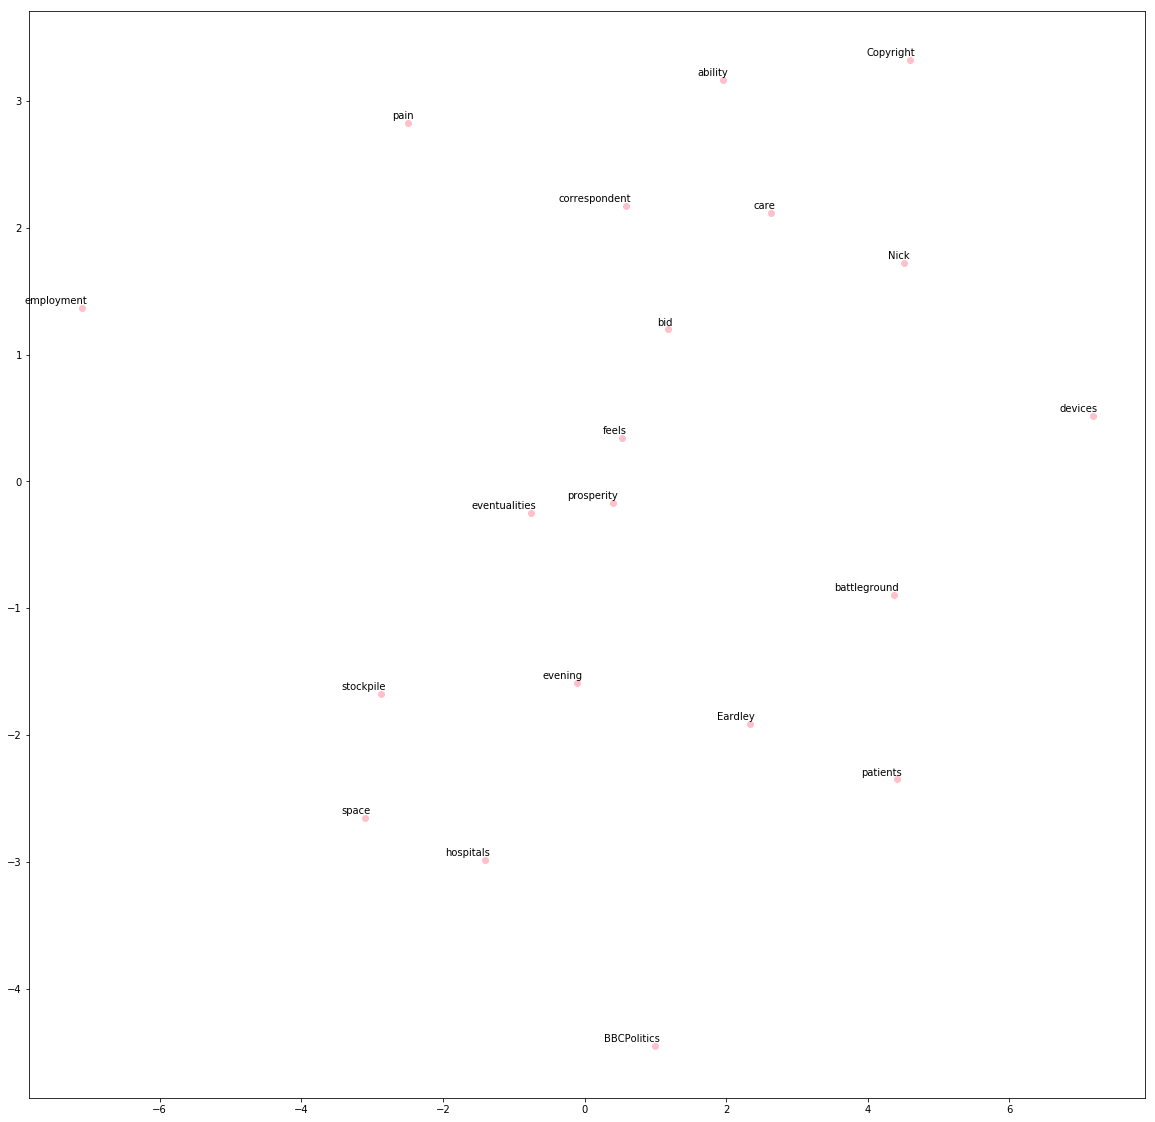

In [17]:

numberOfWords = 20
wordInfo = []

for topicIndex in range (2, 3):
    word2vecProcessor.setTopicFilter(topicIndex)
    wordInfo += word2vecProcessor.getPoints(numberOfWords)
    
processedWords = []
removeWords = ['support', 'peopl', 'govern', 'brexit', 'north']
for word in wordInfo:
    print('x:', word['x'], 'y: ', word['y'], ' --- ', word['stemmed_word'])
    if word['stemmed_word'] not in removeWords:
        processedWords.append(word)
        
plotProcessor = Plotter(wordInfo)
plotProcessor.displayPlot()

